In [17]:
import dataloader
import importlib
import numpy as np
importlib.reload(dataloader)
import matplotlib.pyplot as plt

In [18]:
dataset = dataloader.MetaGratingDataLoader(return_hres=True, n_samp_pts=10, lr_data_filename='data/metanet_lr_data_downsamp16.npy')

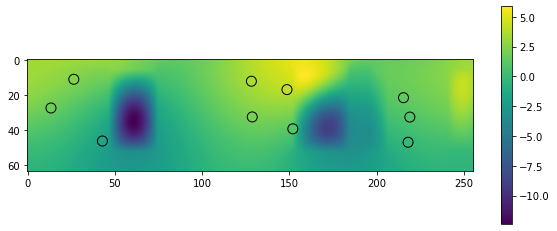

In [19]:
hr_eps, lr_fields, pt_coos, pt_vals, hr_fields = dataset[4]

fig = plt.figure(figsize=(10, 4))
plt.imshow(hr_fields[0])

cbar = plt.colorbar()
color_func = lambda num: cbar.cmap((num - cbar.vmin)/(cbar.vmax - cbar.vmin))

xs = ((1+pt_coos[:, 0])/2)*hr_eps.shape[0]
zs = ((1+pt_coos[:, 1])/2)*hr_eps.shape[1]

plt.scatter(x=zs, y=xs, c=color_func(pt_vals[:,0]), s=100, edgecolors='black')



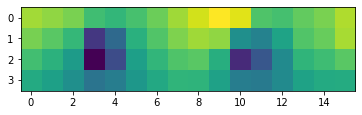

In [20]:
plt.imshow(lr_fields[0])

# Test Behavior of Pytorch Grid Sampler

(10, 2)
torch.Size([1, 1, 10, 2])
torch.Size([1, 1, 1, 10])


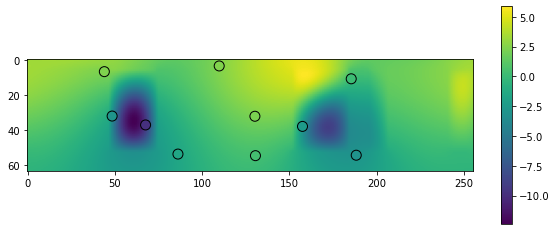

In [31]:
import torch
import torch.nn.functional as F
import torch.nn as nn

print(pt_coos.shape)

ext_pt_coos = torch.tensor(pt_coos).unsqueeze(0).unsqueeze(0)
print(ext_pt_coos.shape)

ext_hr_field = torch.tensor(hr_fields[0]).unsqueeze(0).unsqueeze(0)

samp_hr_field_pts = F.grid_sample(ext_hr_field, ext_pt_coos, align_corners=False)

print(samp_hr_field_pts.shape)

fig = plt.figure(figsize=(10, 4))
plt.imshow(hr_fields[0])

cbar = plt.colorbar()
color_func = lambda num: cbar.cmap((num - cbar.vmin)/(cbar.vmax - cbar.vmin))

xs = ((1+pt_coos[:, 1])/2)*hr_eps.shape[0]
zs = ((1+pt_coos[:, 0])/2)*hr_eps.shape[1]

plt.scatter(x=zs, y=xs, c=color_func(samp_hr_field_pts[0,0,0,:]), s=100, edgecolors='black')
